In [10]:
import warnings
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
# https://github.com/ayushjain1594/Stock-Forecasting/blob/master/Final_Report.pdf

In [21]:
import pandas as pd
import pandas_datareader.data as web
import sklearn.mixture as mix

import numpy as np
import scipy.stats as scs

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
%matplotlib inline

import seaborn as sns
import missingno as msno
from tqdm import tqdm
p=print

In [ ]:
start = pd.to_datetime('2002-01-01')
end = pd.datetime.today()

mkt = '^GSPC'
MKT = (web.DataReader([mkt], 'yahoo', start, end)['Adj Close']
       .rename(columns={mkt:mkt})
       .assign(sret=lambda x: np.log(x[mkt]/x[mkt].shift(1)))
       .dropna())


In [11]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

PLOT_SHOW=True
PLOT_TYPE = False

NUM_TEST = 100
K = 50
NUM_ITERS=10000

STOCKS=['apple.csv']

NUM_STATES=12
FILE_NAME='HistoricalQuotes.csv'
TRAIN_CHUNK_SIZE=100

In [4]:
dirichlet_params = np.array([1., 20., 20., 20.])
dirichlet_params = np.random.randint(1,50,NUM_STATES)
labels = ['Close','Open','High','Low']
likelihood_vect = np.empty([0,1])
aic_vect = np.empty([0,1])
bic_vect = np.empty([0,1])

In [12]:
dirichlet_params = np.array([1., 20., 20., 20.])
print(dirichlet_params)

[ 1. 20. 20. 20.]


In [13]:
dirichlet_params = np.random.randint(1,50,NUM_STATES)
print(dirichlet_params)

[20 25 18 29 10 34  1 33 20 48 21 20]


In [14]:
labels = ['Close','Open','High','Low']
likelihood_vect = np.empty([0,1])
print(likelihood_vect)

[]


In [16]:
aic_vect = np.empty([0,1])
bic_vect = np.empty([0,1])
print(aic_vect)
print(bic_vect)

[]
[]


In [17]:
# Possible number of states in Markov Model
STATE_SPACE = range(2,15)

# Calculating Mean Absolute Percentage Error of predictions
def calc_mape(predicted_data, true_data):
    return np.divide(np.sum(np.divide(np.absolute(predicted_data - true_data), true_data), 0), true_data.shape[0])

In [18]:
for stock in STOCKS:
    dataset = np.genfromtxt(stock, delimiter=',')
    predicted_stock_data = np.empty([0,dataset.shape[1]])
    likelihood_vect = np.empty([0,1])
    aic_vect = np.empty([0,1])
    bic_vect = np.empty([0,1])
    for states in STATE_SPACE:
        num_params = states**2 + states
        dirichlet_params_states = np.random.randint(1,50,states)
        #model = hmm.GaussianHMM(n_components=states, covariance_type='full', startprob_prior=dirichlet_params_states, transmat_prior=dirichlet_params_states, tol=0.0001, n_iter=NUM_ITERS, init_params='mc')
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        model.fit(dataset[NUM_TEST:,:])
        if model.monitor_.iter == NUM_ITERS:
            print('Increase number of iterations')

In [7]:
for stock in STOCKS:
    dataset = np.genfromtxt(stock, delimiter=',')
    predicted_stock_data = np.empty([0,dataset.shape[1]])
    likelihood_vect = np.empty([0,1])
    aic_vect = np.empty([0,1])
    bic_vect = np.empty([0,1])
    for states in STATE_SPACE:
        num_params = states**2 + states
        dirichlet_params_states = np.random.randint(1,50,states)
        #model = hmm.GaussianHMM(n_components=states, covariance_type='full', startprob_prior=dirichlet_params_states, transmat_prior=dirichlet_params_states, tol=0.0001, n_iter=NUM_ITERS, init_params='mc')
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        model.fit(dataset[NUM_TEST:,:])
        if model.monitor_.iter == NUM_ITERS:
            print('Increase number of iterations')
            sys.exit(1)
        likelihood_vect = np.vstack((likelihood_vect, model.score(dataset)))
        aic_vect = np.vstack((aic_vect, -2 * model.score(dataset) + 2 * num_params))
        bic_vect = np.vstack((bic_vect, -2 * model.score(dataset) +  num_params * np.log(dataset.shape[0])))
    
    opt_states = np.argmin(bic_vect) + 2
    print('Optimum number of states are {}'.format(opt_states))

Optimum number of states are 13


Model score :  -12779.706522752527
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12779.684412004526
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12779.821744205152
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12778.766481919674
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12779.199244254653
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12779.120053606539
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12938.932144924864
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12938.580493447498
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12938.650363574303
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12938.146181741946
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12937.33261374

Model score :  -12864.013613849213
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12863.581418491318
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12863.525839389154
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12862.703633051675
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12862.637024007645
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12862.682788412774
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12862.085274502653
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12862.245589156164
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12862.291274342771
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12861.868020069003
Dirichlet parameters :  [20 25 18 29 10 34  1 33 20 48 21 20]
Model score :  -12862.04138865

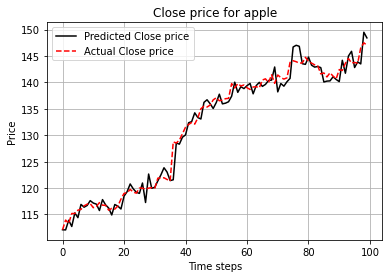

In [19]:
for idx in reversed(range(NUM_TEST)):
        train_dataset = dataset[idx + 1:,:]
        test_data = dataset[idx,:]; 
        num_examples = train_dataset.shape[0]
        #model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', startprob_prior=dirichlet_params, transmat_prior=dirichlet_params, tol=0.0001, n_iter=NUM_ITERS, init_params='mc')
        if idx == NUM_TEST - 1:
            model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='stmc')
        else:
            # Retune the model by using the HMM paramters from the previous iterations as the prior
            model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='')
            model.transmat_ = transmat_retune_prior 
            model.startprob_ = startprob_retune_prior
            model.means_ = means_retune_prior
            model.covars_ = covars_retune_prior

        model.fit(np.flipud(train_dataset))

        transmat_retune_prior = model.transmat_
        startprob_retune_prior = model.startprob_
        means_retune_prior = model.means_
        covars_retune_prior = model.covars_

        if model.monitor_.iter == NUM_ITERS:
            print('Increase number of iterations')
            sys.exit(1)
        print('Model score : ', model.score(dataset))
        print('Dirichlet parameters : ',dirichlet_params)
        
        iters = 1;
        past_likelihood = []
        curr_likelihood = model.score(np.flipud(train_dataset[0:K - 1, :]))
        while iters < num_examples / K - 1:
            past_likelihood = np.append(past_likelihood, model.score(np.flipud(train_dataset[iters:iters + K - 1, :])))
            iters = iters + 1
        likelihood_diff_idx = np.argmin(np.absolute(past_likelihood - curr_likelihood))
        predicted_change = train_dataset[likelihood_diff_idx,:] - train_dataset[likelihood_diff_idx + 1,:]
        predicted_stock_data = np.vstack((predicted_stock_data, dataset[idx + 1,:] + predicted_change))
np.savetxt('{}_forecast.csv'.format(stock),predicted_stock_data,delimiter=',',fmt='%.2f')

mape = calc_mape(predicted_stock_data, np.flipud(dataset[range(100),:]))
print('MAPE for the stock {} is '.format(stock),mape)

if PLOT_TYPE:
    hdl_p = plt.plot(range(100), predicted_stock_data);
    plt.title('Predicted stock prices')
    plt.legend(iter(hdl_p), ('Close','Open','High','Low'))
    plt.xlabel('Time steps')
    plt.ylabel('Price')
    plt.figure()
    hdl_a = plt.plot(range(100),np.flipud(dataset[range(100),:]))
    plt.title('Actual stock prices')
    plt.legend(iter(hdl_p), ('Close','Open','High','Low'))
    plt.xlabel('Time steps')
    plt.ylabel('Price')
else:
    for i in range(4):
        plt.figure()
        plt.plot(range(100), predicted_stock_data[:,i],'k-', label = 'Predicted '+labels[i]+' price');
        plt.plot(range(100),np.flipud(dataset[range(100),i]),'r--', label = 'Actual '+labels[i]+' price')
        plt.xlabel('Time steps')
        plt.ylabel('Price')
        plt.title(labels[i]+' price'+ ' for '+stock[:-4])
        plt.grid(True)
        plt.legend(loc = 'upper left')
        

if PLOT_SHOW:
    plt.show(block=False)

In [9]:
print('MAPE for the stock {} is '.format(stock),mape)

MAPE for the stock apple.csv is  [0.00823101 0.0092812  0.00772725 0.0077912 ]


In [20]:
print('MAPE for the stock {} is '.format(stock),mape)

MAPE for the stock apple.csv is  [0.00862423 0.00930183 0.00812473 0.00791728]
